Name: Zhihao Zhang (Zihow Cheung)

Stanford Email: fdpw14@stanford.edu

# Part 1: Data Gathering and Filtering

Link to get the dataset:
https://www.kaggle.com/datasets/edsonmarin/historic-sales-of-electric-vehicles

In [41]:
import pandas as pd
Dataset = "IEA-EV-dataEV salesCarsHistorical 5.csv"

df = pd.read_csv(Dataset)
sales = df.copy()

In [42]:
import numpy as np
import matplotlib.pyplot as plt

!pip install scikit-learn
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

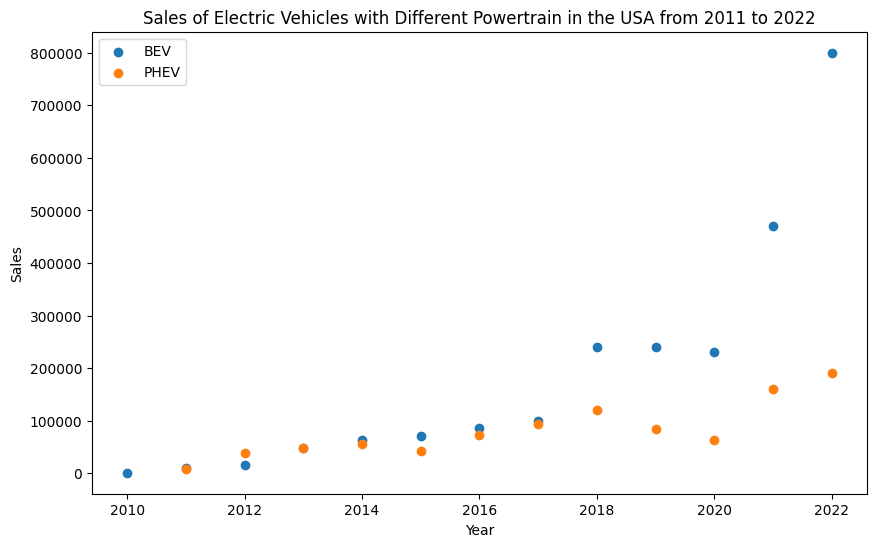

In [43]:
US_powertrain = sales[sales["region"] == "USA"]
US_powertrain["powertrain"].value_counts()
plt.figure(figsize=(10, 6))

for powertrain in US_powertrain["powertrain"].unique():
    powertrain_data = US_powertrain[US_powertrain["powertrain"] == powertrain]
    plt.scatter(powertrain_data["year"], powertrain_data["value"], label=powertrain)

plt.title("Sales of Electric Vehicles with Different Powertrain in the USA from 2011 to 2022")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()
plt.show()


<ipython-input-44-8cbf9236920a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_BEV["year"] = US_BEV["year"].astype(int)
<ipython-input-44-8cbf9236920a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_PHEV["year"] = US_PHEV["year"].astype(int)


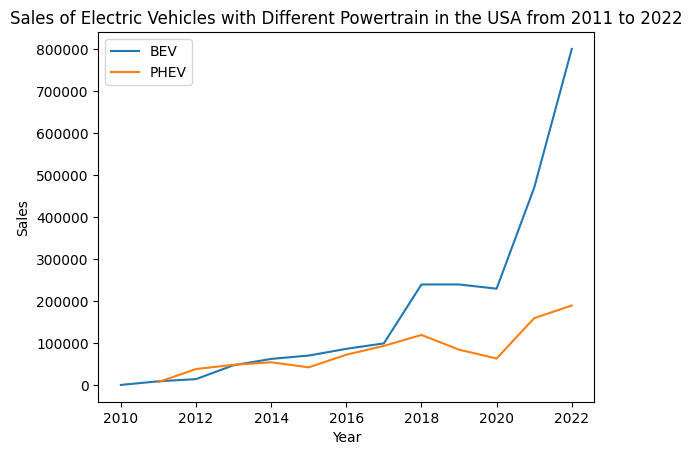

In [44]:
US_EVs = sales[sales["region"] == "USA"]
US_BEV = US_EVs[US_EVs["powertrain"] == "BEV"]
US_PHEV = US_EVs[US_EVs["powertrain"] == "PHEV"]

US_BEV["year"] = US_BEV["year"].astype(int)
US_PHEV["year"] = US_PHEV["year"].astype(int)

US_BEV_sales = US_BEV.groupby("year")["value"].sum()
US_PHEV_sales = US_PHEV.groupby("year")["value"].sum()


US_BEV_sales.plot(label="BEV")
US_PHEV_sales.plot(label="PHEV")
plt.title("Sales of Electric Vehicles with Different Powertrain in the USA from 2011 to 2022")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Part 2: Linear Regression

1. Scatter Diagram

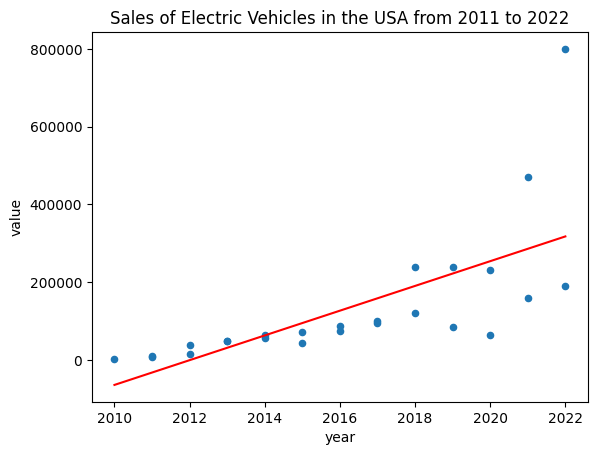

In [45]:
US_sales = sales[sales["region"] == "USA"]
US_sales.plot.scatter(x = "year", y = "value")
coefficients = np.polyfit(US_sales["year"], US_sales["value"], 1)
poly = np.poly1d(coefficients)
plt.plot(US_sales["year"], poly(US_sales["year"]), color = "red")
plt.title("Sales of Electric Vehicles in the USA from 2011 to 2022")
plt.show()

2. Regression Line

In [46]:
slope, intercept = np.polyfit(US_sales["year"], US_sales["value"], 1)
print("Slope:", slope)
print("Intercept:", intercept)
print(f"The regression line equation is: y = {slope:.2f}x + {intercept:.2f}")

Slope: 31836.722195003324
Intercept: -64056272.7584535
The regression line equation is: y = 31836.72x + -64056272.76


3. Predicted sales in year 2020

In [47]:
predicted_US_sales = slope * 2020 + intercept
print("Predicted sales for 2020 in the world:", predicted_US_sales)

Predicted sales for 2020 in the world: 253906.0754532069


4. Model Evaluation

In [48]:
observed = US_sales["value"]
predicted = poly(US_sales["year"])
mse = mean_squared_error(observed, predicted)
sse = np.sum((observed - predicted) ** 2)
mae = np.mean(np.abs(observed - predicted))
r2 = r2_score(observed, predicted)
print("Mean Squared Error:", mse)
print("Sum of Squared Errors:", sse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 15496672561.097334
Sum of Squared Errors: 387416814027.43335
Mean Absolute Error: 77894.1852033326
R-squared: 0.46073056447139615


In [49]:
sum_US_sales_2020 = US_sales[US_sales["year"] == 2020]["value"].sum()
sum_US_sales_2020

294000

# Part 3: KNN Model

1. Predicted salas based on KNN model

In [50]:
X = sales[sales["region"] == "USA"][["year"]]
y = sales[sales["region"] == "USA"]["value"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
X_2020 = scaler.transform([[2020]])
y_pred = knn.predict(X_2020)
print("Predicted sales for 2020 in the USA:", y_pred)

Predicted sales for 2020 in the USA: [201800.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


2. KNN MSE and KNeighbors Regressor

K = 1 Mean Squared Error: 77366792000.0
K = 2 Mean Squared Error: 47579058000.0
K = 3 Mean Squared Error: 59404472000.000015
K = 4 Mean Squared Error: 69273450000.0
K = 5 Mean Squared Error: 69279747520.0
K = 6 Mean Squared Error: 69034247555.55557
K = 7 Mean Squared Error: 74115510857.14285
K = 8 Mean Squared Error: 76053703250.0
K = 9 Mean Squared Error: 77243777777.77776
K = 10 Mean Squared Error: 79635834960.0


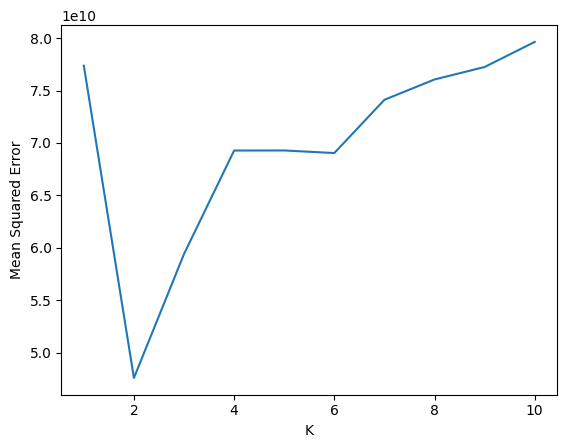

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor # Use Regressor for continuous data
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = sales[sales["region"] == "USA"][["year"]]
y = sales[sales["region"] == "USA"]["value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


mse_values = []
for k in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("K =", k, "Mean Squared Error:", mse)
    mse_values.append(mse)

plt.plot(range(1, 11), mse_values)
plt.xlabel("K")
plt.ylabel("Mean Squared Error")
plt.show()

3. Dummy MSE

In [52]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
y_dummy_pred = dummy.predict(X_test)
mse_dummy = mean_squared_error(y_test, y_dummy_pred)

print(f'Model MSE: {mse}')
print(f'Dummy Model MSE: {mse_dummy}')

Model MSE: 79635834960.0
Dummy Model MSE: 101962796900.0
